In [3]:
# import libraries
import matplotlib.pyplot as plt
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay
from openpile.utils.py_curves import api_sand
from openpile.analyses import simple_winkler_analysis


In [4]:
from openpile.construct import Pile, SoilProfile, Model, Layer
from openpile.soilmodels import API_sand, API_clay

# create pile
pile = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="Layer 1 - medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, Neq=100),
        ),
        Layer(
            name="Layer 2 - Firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, Neq=100),
        ),
    ],
)

print(sp)


Layer 1
------------------------------
Name: Layer 1 - medium dense sand
Elevation: (0.0) - (-20.0) m
Weight: 18.0 kN/m3
Lateral model: 	API sand
	phi = 33.0°
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Layer 2
------------------------------
Name: Layer 2 - Firm clay
Elevation: (-20.0) - (-40.0) m
Weight: 18.0 kN/m3
Lateral model: 	API clay
	Su = 50.0-70.0 kPa
	eps50 = 0.015
	Cyclic, N = 100 cycles
Axial model: None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [5]:
# Create Model
M = Model.create(name="", pile=pile, soil=sp)

# create point load
M.set_support(elevation=-30, Tx=True)
# M.set_support(elevation=0, Rz = True)
# M.set_pointdisplacement(elevation=0, Ty=0.1)
M.set_pointload(elevation=0, Px=-20000, Py=10e3)


AttributeError: 'SoilProfile' object has no attribute 'water_elevation'

In [ ]:
result = simple_winkler_analysis(model=M)


In [ ]:
result.plot()


In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)

print(layer1)


In [ ]:
M.global_restrained


Text(0.5, 0, 'z [m]')

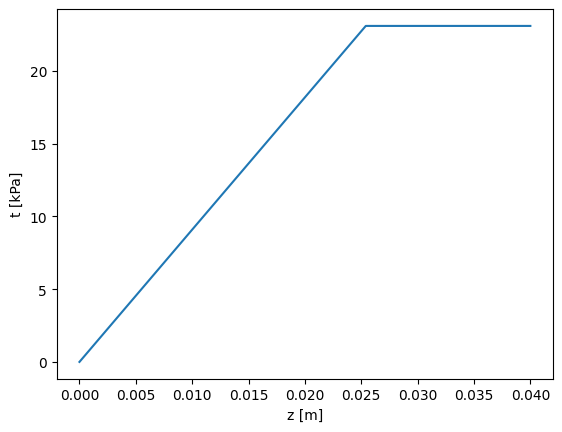

In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.tz_curves import api_sand

t, z = api_sand(50, 30)

plt.plot(z, t)
plt.ylabel("t [kPa]")
plt.xlabel("z [m]")


Converged at iteration no. 2


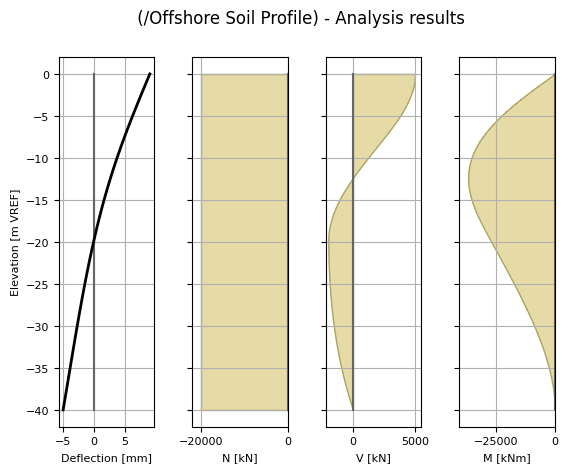

In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [7.5, 7.5],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_elevation=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, Neq=100),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, Neq=100),
        ),
    ],
)

# Create Model
M = Model.create(name="", pile=p, soil=sp, distributed_moment=True)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral load
M.set_pointload(elevation=0, Px=-20e3, Py=5e3)

# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

Result.plot()


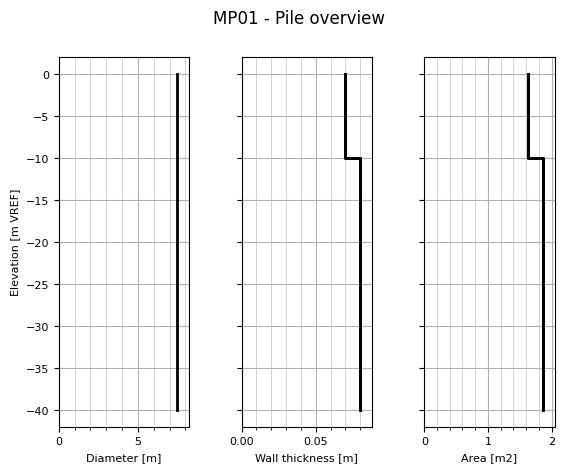

In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="MP01",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [7.5, 7.5],
        "wall thickness": [0.07, 0.08],
    },
)

p.plot()


In [ ]:
layer = Layer(
    name="Soft Clay",
    top=-10,
    bottom=0,
    weight=19,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [10, 30],
        "diameter": [1, 1],
        "wall thickness": [0.5, 0.5],
    },
)

p.area


0.7853981633974483

/Users/guillaumemelin/Desktop/svc/openpile/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
The method Pile.create() will be removed in version 1.0.0.
Please use the base class to create a Pile instead.
  del sys.path[0]


Converged at iteration no. 2


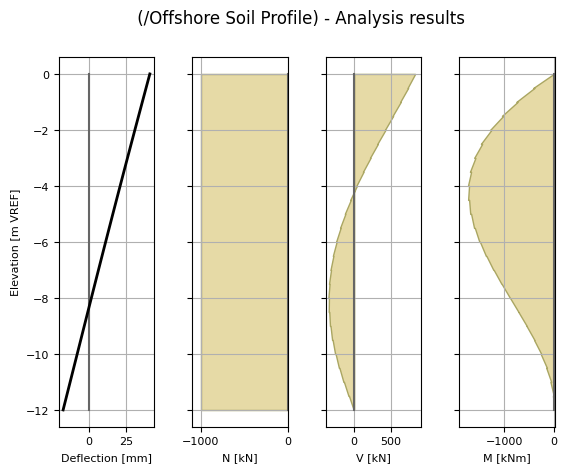

In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="",
            top=0,
            bottom=-15,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

# Create Model
M = Model(
    name="",
    pile=p,
    soil=sp,
    coarseness=0.5,
)

# Apply bottom fixity along x-axis
M.set_support(elevation=-12, Tx=True)
# Apply axial and lateral load
M.set_pointload(elevation=0, Px=-1e3, Py=1e3)
# M.set_pointdisplacement(elevation=0, Ty=0.02)
# Run analysis
from openpile.analyses import simple_winkler_analysis

Result = simple_winkler_analysis(M)

Result.plot()


In [2]:
Result.py_mobilization


,Elevation [m],p_mobilized [kN/m],p_max [kN/m]
0,0.0,196.744961,1079.699951
1,-0.5,210.493037,1237.823486
2,-0.5,210.493037,1237.823486
3,-1.0,218.985862,1384.209961
4,-1.0,218.985862,1384.209961
5,-1.5,222.759126,1519.730713
6,-1.5,222.759126,1519.730713
7,-2.0,222.298316,1645.192505
8,-2.0,222.298316,1645.192505
9,-2.5,218.046821,1761.341675


array([1079.7   , 1237.8235, 1237.8235, 1384.21  , 1384.21  , 1519.7307,
       1519.7307, 1645.1925, 1645.1925, 1761.3417, 1761.3417, 1868.8696,
       1868.8696, 1968.4163, 1968.4163, 2060.5737, 2060.5737, 2145.8909,
       2145.8909, 2224.8755, 2224.8755, 2297.9973, 2297.9973, 2365.6914,
       2365.6914, 2428.361 , 2428.361 , 2486.379 , 2486.379 , 2540.0903,
       2540.0903, 2589.815 , 2589.815 , 2635.8486, 2635.8486, 2678.4653,
       2678.4653, 2717.9192, 2717.9192, 2754.444 , 2754.444 , 2788.2583,
       2788.2583, 2819.5625, 2819.5625, 2848.543 , 2848.543 , 2875.3723],
      dtype=float32)

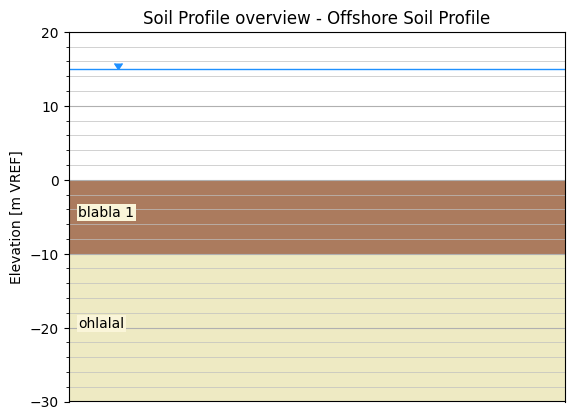

In [2]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="blabla 1",
            top=0,
            bottom=-10,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
        Layer(
            name="ohlalal",
            top=-10,
            bottom=-30,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

sp.plot()
